#Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)

In [ ]:
def fwd_euler(h):
  a = 0
  b = 10
  y_values = [5]
  x_values = [0]
  nh = int(10/h)
  for i in range(nh):
    y_values.append(y_values[-1]-(2*h*y_values[-1]))
    x_values.append(x_values[-1]+h)
  coeff = np.polyfit(np.array(x_values), np.array(y_values), len(x_values))
  xn = np.linspace(0, 10, 1000)
  yn = np.poly1d(coeff)
  plt.plot(xn, yn(xn), label=f"step={h}")
  plt.ylim(-10,10)
  plt.legend()

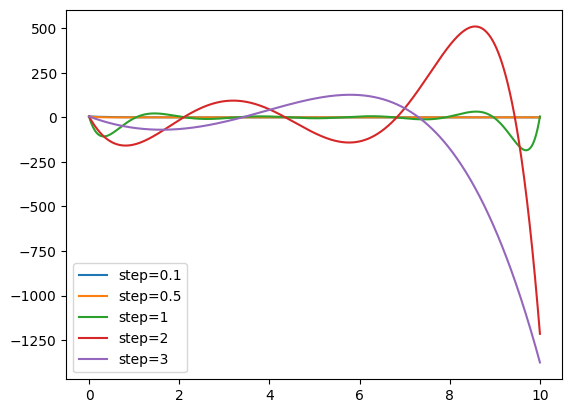

In [ ]:
h_list = [0.1, 0.5, 1, 2, 3]
for i in h_list:
  fwd_euler(i)

#Question 2

In [ ]:
def bwd_euler(h):
  a = 0
  b = 10
  y_values = [5]
  x_values = [0]
  nh = int(10/h)
  for i in range(nh):
    y_values.append(y_values[-1]/(1+(2*h)))
    x_values.append(x_values[-1]+h)
  coeff = np.polyfit(np.array(x_values), np.array(y_values), len(x_values))
  xn = np.linspace(0, 10, 1000)
  yn = np.poly1d(coeff)
  plt.plot(xn, yn(xn), label=f"step={h}")
  plt.ylim(-10,10)
  plt.legend()

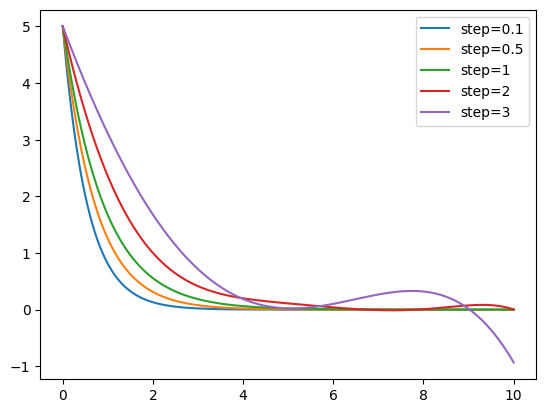

In [ ]:
for i in h_list:
  bwd_euler(i)

#Question 3

In [ ]:
#sujit but I understood

In [ ]:
import math
from matplotlib.animation import FuncAnimation

In [ ]:
def ode(t, theta, v, g, L):
    return (v, -(g/L)*math.sin(theta))


def pendulumODE(ode, g, L, v0, theta0, t0, T, h):
    currT = t0
    currV = v0
    currTheta = theta0
    thetaList = [theta0]

    while currT <= T:
        currODE = ode(currT, currTheta, currV, g, L)
        currTheta += h*currODE[0]
        currV += h*currODE[1]
        thetaList.append(currTheta)
        currT += h

    initX, initY = L*math.sin(theta0), -L*math.cos(theta0)

    fig = plt.figure()
    ax = fig.add_subplot(aspect='equal')

    (line,) = ax.plot([0, initX], [0, initY], lw=3, color='blue')
    pendulum = ax.add_patch(plt.Circle(
        (initX, initY), 0.01, color='black', zorder=3))
    patches = [line, pendulum]

    def anim_init():
        ax.set_title("Gravity Pendulum")
        ax.set_xlim(-2*L, 2*L)
        ax.set_ylim(-2*L, 2*L)

        return patches

    def animate(i):
        x, y = L*math.sin(thetaList[i]), -L*math.cos(thetaList[i])

        line.set_data([0, x], [0, y])
        pendulum.set_center((x, y))

        return patches

    numFrames = len(thetaList)
    interval = 1

    anim = FuncAnimation(fig, animate, init_func=anim_init,
                         frames=numFrames, repeat=True, interval=interval, blit=True,)
    plt.grid()
    plt.show()
    return anim

In [ ]:
animation = pendulumODE(ode, 10, 0.1, 0, math.pi/4, 0, 10, 0.01)

In [ ]:
# animation.save('/content/drive/MyDrive/CVs/iters.mp4', writer = 'ffmpeg', fps = 10)

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/content/drive/MyDrive/CVs/iters.mp4']' returned non-zero exit status 255.

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')
matplotlib.rcParams['animation.embed_limit'] = 2**128


NameError: name 'matplotlib' is not defined

In [ ]:
my_file = open("/content/drive/MyDrive/CVs/trial.txt", "r")

# reading the file
data = my_file.read()

# replacing end splitting the text
# when newline ('\n') is seen.
data_into_list = data.split("\n")
for data_line in data_into_list:
  data_line = data_into_list[0].split(",")

print(data_into_list)

print(data_line)
my_file.close()

#Question 4

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
# Define the second-order ODE
def second_order_ode(t, y, u):
    dydt = y[1]  # z = dy/dt
    dzdt = u*(y[0]**2-1)*y[1]-y[0] # Example: d^2y/dt^2 = -y
    return [dydt, dzdt]

In [ ]:
print(dir(solve_ivp))

['__annotations__', '__builtins__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [ ]:
def q4(u, x0, z0, t0, tf, n=1000):
  t_span = (t0,tf)
  sol = solve_ivp(second_order_ode, t_span, [x0,z0], t_eval=np.linspace(t0, tf, n), args=[u])
  # Plot the solution
  plt.plot(sol.t, sol.y[0], label='x(t)')
  # plt.plot(sol.t, sol.y[1], label='dx(t)/dt')
  plt.xlabel('Time (t)')
  plt.ylabel('Solution')
  plt.title('Solution of VanDerPol Eqn')
  plt.legend()
  plt.grid(True)
  plt.show()

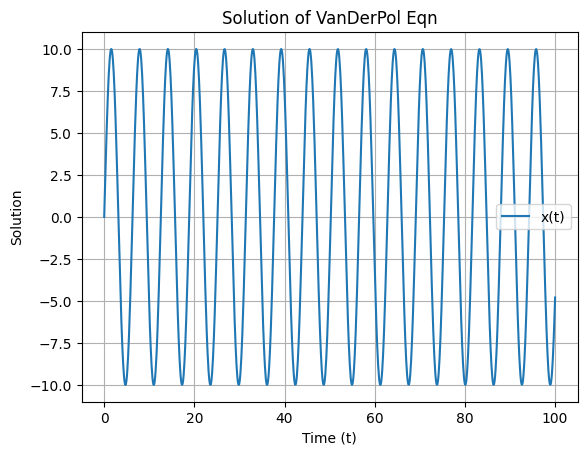

In [ ]:
q4(0, 0, 10, 0, 100)

In [ ]:

# # Initial conditions
# y0 = [0, 1]  # initial value of x(0) and dx/dt(0)

# # Time span
# t_span = (0, 10)

# # Solve the ODE
# sol = solve_ivp(odesystem, t_span, y0, t_eval=np.linspace(0, 10, 100))

# # Plot the solution
# plt.plot(sol.t, sol.y[0], label='x(t)')
# plt.plot(sol.t, sol.y[1], label='dx(t)/dt')
# plt.xlabel('Time (t)')
# plt.ylabel('Solution')
# plt.title('Solution of Second-Order ODE')
# plt.legend()
# plt.grid(True)
# plt.show()


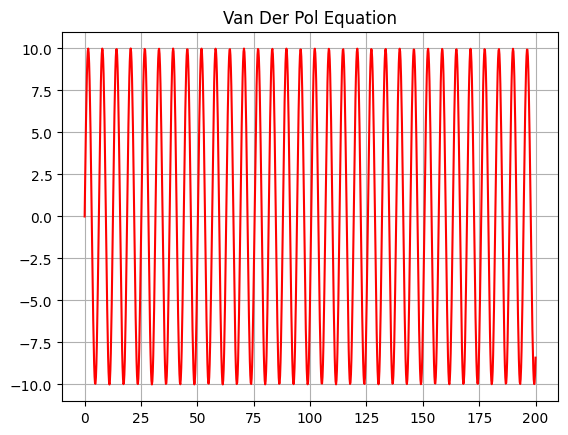

Time period of the oscillation for mu=0: 2


In [ ]:
# SUJIT
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import solve_ivp


# def solveVanDerPol(x0, v0, mu, t0, T, n=1000):
#     def ivpFunc(t, y):
#         x, v = y
#         return [v, mu*(1-(x**2))*v-x]

#     t = np.linspace(t0, T, n)
#     solution = solve_ivp(fun=ivpFunc, t_span=[t0, T], y0=[x0, v0], t_eval=t)
#     Xt = solution.y[0]
#     plt.title("Van Der Pol Equation")
#     plt.plot(t, Xt, color='r')
#     plt.grid()
#     plt.show()

#     pt1 = 0
#     for i in range(1, n):
#         if Xt[i-1] <= 0 and Xt[i] >= 0:
#             pt1 = i
#             break

#     pt2 = -1
#     for i in range(1, pt1):
#         if Xt[i-1] <= 0 and Xt[i] >= 0:
#             pt2 = i
#             break

#     timePeriod = abs(pt1-pt2)
#     print(f"Time period of the oscillation for mu={mu}: {timePeriod}")


# if __name__ == "__main__":
#     solveVanDerPol(x0=0, v0=10, mu=0, t0=0, T=200)

#Question 5

In [ ]:
#SUJEEEEEEEEEEEEEEEEET

In [ ]:
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt


def norm12(r1, r2):
    return max(np.linalg.norm(r2-r1), 20)


def rdd(r, rA, rB):
    return (rA-r)/(norm12(r, rA)**3) + (rB-r)/(norm12(r, rB)**3)


def calcCentre(r1, r2, r3):
    rCentre = []
    for i in range(len(r1)):
        rCentre.append((r1[i]+r2[i]+r3[i])/3)
    return rCentre


def solveODE(rInit, vInit, t0, T, n=1000):
    def ivpFunc(t, y):
        r1x, r1y, r2x, r2y, r3x, r3y, v1x, v1y, v2x, v2y, v3x, v3y = y
        r1 = np.array([r1x, r1y])
        r2 = np.array([r2x, r2y])
        r3 = np.array([r3x, r3y])
        v1 = [v1x, v1y]
        v2 = [v2x, v2y]
        v3 = [v3x, v3y]

        v1d = rdd(r1, r2, r3)
        v2d = rdd(r2, r1, r3)
        v3d = rdd(r3, r1, r2)
        return [*v1, *v2, *v3, *v1d, *v2d, *v3d]

    t = np.linspace(t0, T, n)

    solution = solve_ivp(fun=ivpFunc, t_span=[t0, T], y0=[
                         *rInit, *vInit], t_eval=t)

    r1x, r1y, r2x, r2y, r3x, r3y, *vs = solution.y

    fig = plt.figure()
    ax = fig.add_subplot(aspect='equal')

    bodyA = ax.add_patch(plt.Circle(
        (r1x[0], r1y[0]), 0.1, color='purple', zorder=3, label='Body A'))
    bodyB = ax.add_patch(plt.Circle(
        (r2x[0], r2y[0]), 0.1, color='orange', zorder=3, label='Body B'))
    bodyC = ax.add_patch(plt.Circle(
        (r3x[0], r3y[0]), 0.1, color='blue', zorder=3, label='Body C'))

    centre = calcCentre([r1x[0], r1y[0]], [r2x[0], r2y[0]], [r3x[0], r3y[0]])
    plt.scatter(centre[0], centre[1], marker='o',
             label="Centre of initial three points", color='black')
    patches = [bodyA, bodyB, bodyC]

    def anim_init():
        ax.set_title("Three Body Problem")
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)

        return patches

    def animate(i):
        bodyA.set_center((r1x[i], r1y[i]))
        bodyB.set_center((r2x[i], r2y[i]))
        bodyC.set_center((r3x[i], r3y[i]))

        return patches

    numFrames = len(r1x)
    anim = FuncAnimation(fig, animate, init_func=anim_init,
                         frames=numFrames, repeat=True, interval=1, blit=True,)

    plt.legend()
    plt.grid()
    plt.show()

    return anim


if __name__ == "__main__":
    r10 = [0, 4]
    r20 = [3.46, -2]
    r30 = [-3.46, -2]
    v10 = [0, 0]
    v20 = [0, 0]
    v30 = [0, 0]

    c = calcCentre(r10, r20, r30)
    # print(c)
    # print(type(c))
    ani = solveODE(rInit=[*r10, *r20, *r30],
                   vInit=[*v10, *v20, *v30], t0=0, T=400)